In [121]:
import rasterio
from rasterio import features
from rasterio import mask
from rasterio.plot import show
from rasterio.plot import show_hist
import os
import json
import pandas as pd
import geopandas as gpd
import pandas as pd
import numpy as np
import fiona

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

### Crop raster to LA County outline

In [15]:
with fiona.open('data/County_Boundary.geojson', "r") as shapefile:
    shapes = [feature['geometry'] for feature in shapefile]

In [16]:
type(shapes)

list

In [124]:
src = rasterio.open(r'data/crs/trees_latlong.tif')
src_meta = src.meta.copy()
src_affine = src_meta.get('transform')

In [109]:
src.shape

(10473, 17599)

In [110]:
# out_img, out_transform = mask(raster=src, shapes=coords, crop=True)

In [111]:
out_img, out_transform = rasterio.mask.mask(src, shapes, all_touched = False, invert = False, nodata = None, 
                                            filled = True, crop = True, pad = False, 
                                            pad_width = 0.5, indexes = None)

In [112]:
out_meta = src.meta.copy()

In [113]:
out_meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 17599,
 'height': 10473,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00024335671691573372, 0.0, -120.072950519,
        0.0, -0.0003227497485916166, 35.592335219)}

In [114]:
out_img.shape

(1, 6285, 5336)

In [115]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[0],
                 "width": out_img.shape[1],
                 "transform": src_affine}
               )

In [116]:
out_tif = r'data/cropped/trees.tif'

In [117]:
with rasterio.open(out_tif, 'w', **src_cr_meta) as dest:
    dest.write(out_img)

In [118]:
tree_cl = rasterio.open(r'data/cropped/trees.tif')

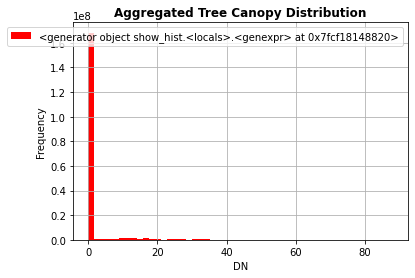

In [122]:
show_hist(tree_cl, bins=50, lw=0.0, stacked = False, histtype = 'stepfilled', 
          title = 'Aggregated Tree Canopy Distribution')

### Wrong file!!